In [ ]:
##### on va import le data sonnt :
## train : --- 1000 cat
#          --- 1000 dog
## test : --- 500 cat
#          --- 500 dog
## verefication : --- 500 cat
#                 --- 500 dog

In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
import tensorflow as tf
from tensorflow import keras

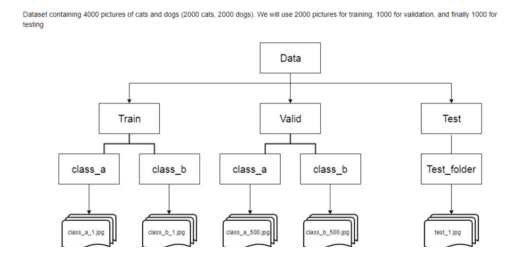

In [19]:
img = mpimg.imread('ph1.png')
plt.imshow(img)
plt.axis('off')  # Pour ne pas afficher les axes
plt.show()

In [20]:
%pwd 

'/workspaces/mlops-zoom'

In [45]:
train_dir =  r'/workspaces/mlops-zoom/train/'
validation_dir = r'/workspaces/mlops-zoom/validation/'
test_dir = r'/workspaces/mlops-zoom/test/cats'

In [22]:
train_dir[10]

's'

In [ ]:
##Data Preprocessing
#####Read the picture files.
#####Decode the JPEG content to RBG grids of pixels.
#####Convert these into floating point tensors.
#####Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator =  test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size = 20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
from tensorflow.keras import layers 
from tensorflow.keras import models

In [26]:

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Attention : 'sigmoid', pas 'sigmold'


                        

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [50]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=28,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step - acc: 0.5097 - loss: 0.6961 - val_acc: 0.5390 - val_loss: 0.6817
Epoch 2/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - acc: 0.5572 - loss: 0.6795 - val_acc: 0.5800 - val_loss: 0.6630
Epoch 3/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - acc: 0.5933 - loss: 0.6646 - val_acc: 0.6150 - val_loss: 0.6456
Epoch 4/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - acc: 0.6354 - loss: 0.6339 - val_acc: 0.5870 - val_loss: 0.6875
Epoch 5/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - acc: 0.6842 - loss: 0.5855 - val_acc: 0.6130 - val_loss: 0.6615
Epoch 6/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - acc: 0.7115 - loss: 0.5647 - val_acc: 0.6670 - val_loss: 0.5980
Epoch 7/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - acc: 0.7321 - loss: 0.5306 - val_acc: 0.6720 - val_loss: 0.5982
Epoch 8/28
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - acc: 0.7379 - loss: 0.5073 - val_acc: 0.6750 - val_loss: 0.5880
Epoch 9/28
100/100 ━━━━━━━━━━━━━

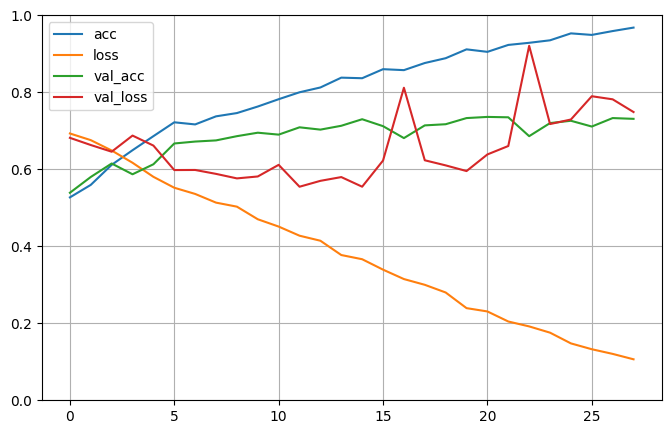

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
model.save("model_cat_dog.keras")

In [29]:
from tensorflow.keras import backend as K

K.clear_session()
del model

In [30]:

# Générateur pour les images d'entraînement avec augmentation de données
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalise les pixels (valeurs entre 0 et 1)
    rotation_range=40,           # Fait pivoter les images aléatoirement (jusqu'à 40°)
    width_shift_range=0.2,       # Décale l'image horizontalement jusqu'à 20% de la largeur
    height_shift_range=0.2,      # Décale l'image verticalement jusqu'à 20% de la hauteur
    shear_range=0.2,             # Applique une transformation de cisaillement
    zoom_range=0.2,              # Zoom aléatoire jusqu'à 20%
    horizontal_flip=True         # Retourne l'image horizontalement (miroir)
)

# Générateur pour les images de validation (pas d'augmentation ici)
test_datagen = ImageDataGenerator(rescale=1./255)

# Générateur d'images d'entraînement à partir du dossier
train_generator = train_datagen.flow_from_directory(
    train_dir,                   # Dossier contenant les sous-dossiers (classes)
    target_size=(150, 150),      # Redimensionne toutes les images à 150x150
    batch_size=32,               # Nombre d'images à charger par batch
    class_mode='binary'          # Pour classification binaire (0 ou 1)
)

# Générateur d'images de validation à partir du dossier
validation_generator = test_datagen.flow_from_directory(
    validation_dir,              # Dossier de validation avec même structure que train_dir
    target_size=(150, 150),      # Même taille que pour l'entraînement
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
# Création d'un modèle séquentiel (empilement de couches)
model = models.Sequential()

# -------- Convolution + MaxPooling (1ère couche) --------
model.add(layers.Conv2D(
    32, (3, 3), 
    activation='relu', 
    input_shape=(150, 150, 3)  # image RGB de taille 150x150
))
model.add(layers.MaxPooling2D((2, 2)))  # Réduction de taille par sous-échantillonnage

# -------- Convolution + MaxPooling (2e bloc) --------
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# -------- Convolution + MaxPooling (3e bloc) --------
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# -------- Convolution + MaxPooling (4e bloc) --------
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# -------- Passage en vecteur --------
model.add(layers.Flatten())  # Aplatit les cartes de caractéristiques en 1D

# -------- Dropout --------
model.add(layers.Dropout(0.5))  # Dropout pour éviter l'overfitting (0.5 = 50%)

# -------- Couche dense cachée --------
model.add(layers.Dense(512, activation='relu'))  # Couche dense avec 512 neurones

# -------- Couche de sortie --------
model.add(layers.Dense(1, activation='sigmoid'))  # 1 neurone (binaire) avec sigmoid (probabilité)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# -------- Compilation --------
model.compile(
    loss='binary_crossentropy',                    # Fonction de perte pour classification binaire
    optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Optimiseur RMSprop avec taux d'apprentissage 0.0001
    metrics=['accuracy']                           # Mesure suivie pendant l'entraînement
)

In [32]:
!pip install scipy

  Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


In [34]:
 
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

/home/codespace/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 63/100 ━━━━━━━━━━━━━━━━━━━━ 19s 537ms/step - accuracy: 0.5213 - loss: 0.6922

/home/codespace/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/home/codespace/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 384ms/step - accuracy: 0.5184 - loss: 0.6926 - val_accuracy: 0.5030 - val_loss: 0.6928
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 374ms/step - accuracy: 0.5196 - loss: 0.6910 - val_accuracy: 0.5620 - val_loss: 0.6861
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.5548 - loss: 0.6884 - val_accuracy: 0.5630 - val_loss: 0.6817
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.5867 - loss: 0.6805 - val_accuracy: 0.5990 - val_loss: 0.6686
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 378ms/step - accuracy: 0.5837 - loss: 0.6766 - val_accuracy: 0.5000 - val_loss: 0.8087
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 377ms/step - accuracy: 0.5783 - loss: 0.6738 - val_accuracy: 0.6040 - val_loss: 0.6556
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.5949 - loss: 0.6722 - val_accuracy: 0.6170 - val_loss: 0.6540
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 375ms/step - accuracy: 0.5978 - loss: 0.6669 - val

In [35]:
model.save("project_cnn.keras")

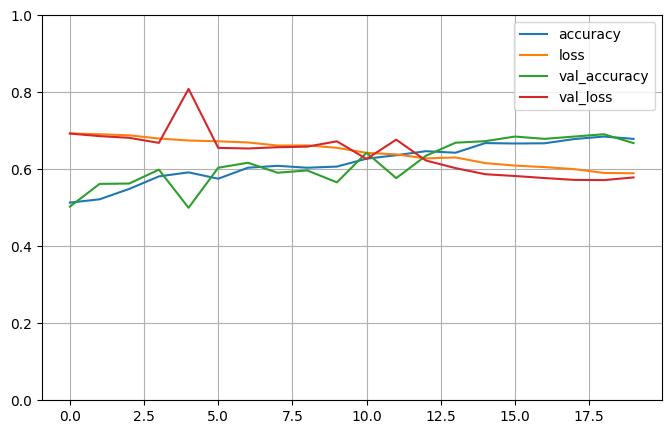

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

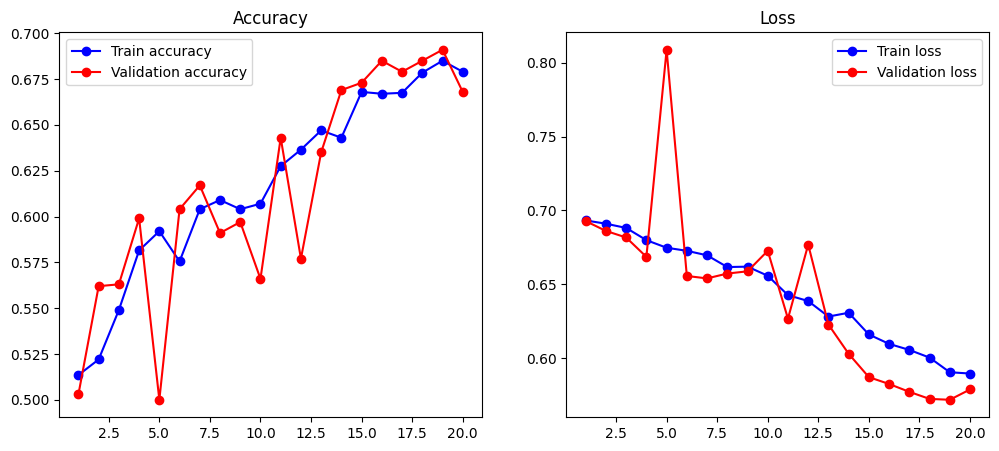

In [37]:
import matplotlib.pyplot as plt

# Affichage de la précision
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Précision
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Train accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Accuracy')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Train loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()


In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random


In [51]:
model = tf.keras.models.load_model('model_cat_dog.keras')

In [103]:
test_dir = r'/workspaces/mlops-zoom/test/dogs'


In [104]:
image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

In [105]:
if not image_files:
    print(f"Aucune image .jpg/.jpeg/.png trouvée dans : {test_dir}")


In [106]:
random_image = random.choice(image_files)
img_path = os.path.join(test_dir, random_image)

In [107]:
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor / 255.0


In [108]:
prediction = model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


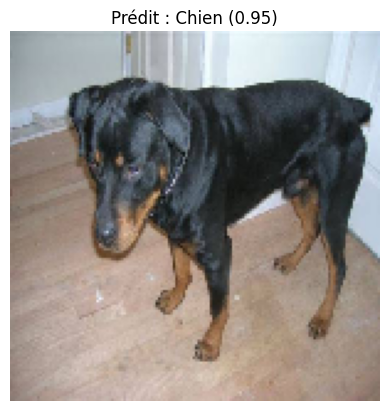

In [109]:
plt.imshow(img)
plt.axis('off')

if prediction[0][0] < 0.5:
    label = f"Prédit : Chat ({prediction[0][0]:.2f})"
else:
    label = f"Prédit : Chien ({prediction[0][0]:.2f})"


plt.title(label)
plt.show()
